In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Sigmoid function
def sigmoid(x):
     return 1.0/(1+ np.exp(-x))
    
# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
     return x * (1.0 - x)

In [3]:
class NeuralNetwork:
    def __init__(self, x, y, N):
            self.input = x
            self.neuron = N
            self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
            self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
            self.y = y
            self.output = np.zeros(self.y.shape) # instantiating the output
    def feedforward(self):
            self.layer1 = sigmoid(np.dot(self.input, self.weights1))
            self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
     # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
            d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
            d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
             # weights updating
            self.weights1 += d_weights1
            self.weights2 += d_weights2
            

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[5.46802685e-04]
 [1.67758232e-02]
 [1.56544391e-02]
 [9.72950420e-01]]


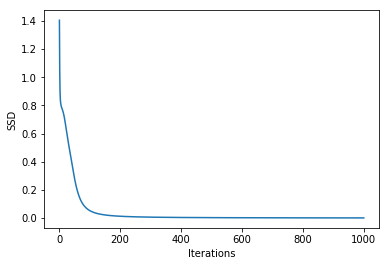

In [4]:
iterations = 1000
n_unit = 2
if __name__ == "__main__":

    Input= np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

    Target = np.array([[0],[0],[0],[1]])

    model = NeuralNetwork(Input, Target, n_unit)

    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors)) # Objective(loss) function

    Itr = np.linspace(1,len(SSD),len(SSD))
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    print("The target values are:", Target)
    print("The predicted values are:", model.output)

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.50681417]
 [0.65251999]
 [0.65252556]
 [0.65638893]]


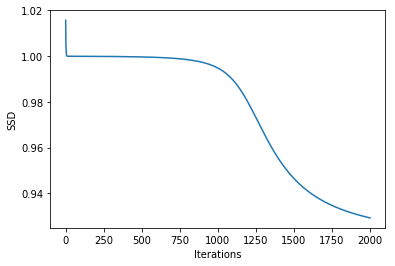

In [5]:
iterations = 2000
n_unit = 1
if __name__ == "__main__":

    Input= np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

    Target = np.array([[0],[1],[1],[0]])

    model = NeuralNetwork(Input, Target, n_unit)

    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors)) # Objective(loss) function

    Itr = np.linspace(1,len(SSD),len(SSD))
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    print("The target values are:", Target)
    print("The predicted values are:", model.output)

In [6]:
# Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [7]:
Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 10
model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
 optimizer = SGD(lr = 0.01),
 metrics=['binary_accuracy'])
model.fit(Input, Target, epochs = 2000, verbose=0)
print("The predicted class labels are:", model.predict(Input))

The predicted class labels are: [[0.48858032]
 [0.50394505]
 [0.6878934 ]
 [0.3783373 ]]


Multilayer perceptron



In [8]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

In [9]:
#This function takes the image name and the two pattern names to test and return 0 if pat1 is in im_name and 1 
#if pat2 is in im_name
def gen_labels(im_name, pat1, pat2):
 
    if pat1 in im_name:
         label = np.array([0])
     
    elif pat2 in im_name:
         label = np.array([1])
     
    return label


In [10]:
#the function creates a list which associates each image with its corresponding label
def get_data(data_path, data_list, img_h, img_w):
     
    img_labels = []
    
    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
        #each image is resized so as all image have the same dimension for the process
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])

        if item[0] % 100 == 0:
            print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))

    shuffle(img_labels)
    return img_labels


In [11]:
#separates the list img_labels obtained with the function get_data into two lists
#one list with the images and one list with the labels
def get_data_arrays(nested_list, img_h, img_w):
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]
    img_arrays = np.expand_dims(img_arrays, axis =3)
    return img_arrays, label_arrays

In [12]:
#this function uses all the previous functions to create a train set and a test set 
def get_train_test_arrays(train_data_path, test_data_path, train_list,test_list, img_h, img_w):
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)

    train_img, train_label = get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)
    return train_img, test_img, train_label, test_label



In [13]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = 'DL_course_data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)


x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


In [14]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
def model(img_width, img_height, img_ch, base_dense):
    input_size = (img_width, img_height, img_ch)
    inputs_layer = Input(shape=input_size, name='input_layer')
    flat=Flatten()(inputs_layer)
    layer1=Dense(base_dense,activation='relu')(flat)
    layer2=Dense(base_dense//2,activation='relu')(layer1)
    layer3=Dense(base_dense//4,activation='relu')(layer2)
    out=Dense(1,activation='sigmoid')(layer3)
    clf = Model(inputs=inputs_layer, outputs=out)
    
    clf.summary()

    return clf

In [19]:
n_epochs=150
batch_size=16
base_dense=64
lr=0.0001

x_val = x_train[-100:]
y_val = y_train[-100:]
x_train = x_train[:-100]
y_train = y_train[:-100]

clf=model(img_w, img_h,np.shape(x_train)[3],base_dense)
clf.compile(loss='binary_crossentropy',optimizer = SGD(lr),metrics=['binary_accuracy'])
clf_hist=clf.fit(x_train,y_train,n_epochs,batch_size,validation_data=(x_val, y_val))


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 128, 128, 1)]     0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                1048640   
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 1,051,265
Trainable params: 1,051,265
Non-trainable params: 0
_________________________________________________

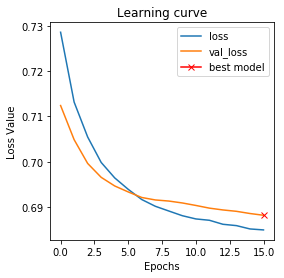

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
 np.min(clf_hist.history["val_loss"]),
 marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 


In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
base=32

In [29]:
def model(img_ch, img_width, img_height):
    model = Sequential()
    model.add(Conv2D(base, kernel_size = (3, 3), activation='relu',
    strides=1, padding='same',
    input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(base*2, kernel_size = (3, 3), activation='relu',
    strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(base*2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    return model


In [32]:
model=model(np.shape(x_train)[3],img_w,img_h)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4194368   
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [36]:
n_epochs=200
batch_size=8

lr=0.00001

x_val = x_train[-100:]
y_val = y_train[-100:]
x_train = x_train[:-100]
y_train = y_train[:-100]


model.compile(loss='binary_crossentropy',optimizer = SGD(lr),metrics=['binary_accuracy'])
model_hist=clf.fit(x_train,y_train,n_epochs,batch_size,validation_data=(x_val, y_val))

Train on 400 samples, validate on 100 samples
Epoch 1/8
400/400 [==============================] - 0s 68us/sample - loss: 0.6725 - binary_accuracy: 0.6425 - val_loss: 0.6835 - val_binary_accuracy: 0.6100
Epoch 2/8
400/400 [==============================] - 0s 56us/sample - loss: 0.6724 - binary_accuracy: 0.6450 - val_loss: 0.6836 - val_binary_accuracy: 0.6100
Epoch 3/8
400/400 [==============================] - 0s 58us/sample - loss: 0.6720 - binary_accuracy: 0.6400 - val_loss: 0.6836 - val_binary_accuracy: 0.6200
Epoch 4/8
400/400 [==============================] - 0s 58us/sample - loss: 0.6719 - binary_accuracy: 0.6375 - val_loss: 0.6837 - val_binary_accuracy: 0.6200
Epoch 5/8
400/400 [==============================] - 0s 58us/sample - loss: 0.6718 - binary_accuracy: 0.6375 - val_loss: 0.6837 - val_binary_accuracy: 0.6200
Epoch 6/8
400/400 [==============================] - 0s 57us/sample - loss: 0.6716 - binary_accuracy: 0.6400 - val_loss: 0.6838 - val_binary_accuracy: 0.6100
Epoch 

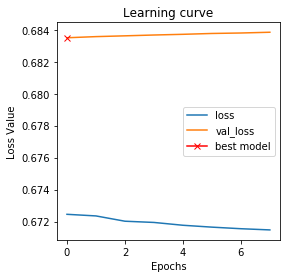

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(model_hist.history["loss"], label="loss")
plt.plot(model_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(model_hist.history["val_loss"]),
 np.min(model_hist.history["val_loss"]),
 marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 
